# Classification of Heart Disease Using K-Nearest Neighbor

## Introduction
Many people die of cardiovascular diseases without knowing they have a problem with their heart. Unexpected deaths as such can be prevented with early diagnosis of cardiovascular issues and proper medication. In this project, we are trying to answer: Can available patient data and the KNN classification algorithm be used to detect the presence of heart diseases? If so, how accurate could it be and how to use it correctly in actual practice? The heart disease dataset we are using is obtained from the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). It contains 303 patient instances and 14 attributes collected from Cleveland.

## Methods and Results
## Methods
### 1. Data Analysis Processes
#### Data Exploration  
We reviewed heart disease-related literature to select predictors to include in the classification task. To better understand our dataset, we implemented exploratory data analysis.

#### Data Modeling（training set） 

- ***Data Splitting***  
  The dataset is split into two sets with a percentage assignment: training set (75%) and testing set (25%). 

- ***Model Training***  
  The *K-Nearest Neighbor* algorithm was used to train the classifier for heart disease classification. To find the optimal classifier, we went through the model tuning process to find the optimal value of K.
  
    - ***Model Tuning***  
  Cross-validation was used to tune the classifier. The training set was split into C folds and iteratively, C-1 folds were used as the training set to train the classifier and 1 fold was used as a validation set to calculate the prediction accuracy. In our project, C is chosen to be either 5 or 10.
  
#### Model Testing and Performance Evaluation (testing set)  
The predicted results and the true results were compared to evaluate the prediction power of the classifier. Specifically, the *Accuracy* metric was used for performance evaluation. A confusion matrix was generated to present the predicted results.

### 2. Predictors Selection
We used `age`, `trestbps` (resting blood pressure on admission to hospital in mm Hg), `chol` (serum cholesterol in mg/dl), `thalach` (maximum heart rate achieved), and `oldpeak` (ST depression induced by exercise relative to rest), as predictors. We selected them among the 13 available variables as they are quantitive variables suited for the KNN algorithm and are believed to be strongly related to the presence of heart diseases.

### 3. Results Visualization
We used the line plot with the scatter plot to present the K-vs.-Accuracy relationship to find out the opitmal value of K to train the classifier. We also added a scatter plot that presents the mapping of the actual labels and predicted labels.

## Results
#### 1. Download and Read the original dataset on the web

In [1]:
# Load packages that will be used.
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# Set the value of seed to ensure reproducibility
set.seed(200)

In [3]:
# Download the dataset from the web
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
download.file(url,destfile='HeartDisease_Cleveland.csv')

In [4]:
# Read the 'HeartDisease_Cleveland.csv' file into a dataframe (a tibble)
heart_cleve <- read_csv('HeartDisease_Cleveland.csv',col_names = FALSE)
head(heart_cleve)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [5]:
# Rename the column names and Format the column types
heart_cleve <- rename(heart_cleve, age = X1,
               sex = X2,
               cp = X3,
               trestbps = X4,
               chol = X5,
               fbs = X6,
               restecg = X7,
               thalach = X8,
               exang = X9,
               oldpeak = X10,
               slope = X11,
               ca = X12,
               thal = X13,
               diagnosis = X14) %>% 
            mutate(ca = as.numeric(ca),thal = as.numeric(thal))
head(heart_cleve)

# mutate(diagnosis = as_factor(diagnosis),ca = as.numeric(ca),thal = as.numeric(thal))

Warning message:
“Problem with `mutate()` input `ca`.
ℹ NAs introduced by coercion
ℹ Input `ca` is `as.numeric(ca)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thal`.
ℹ NAs introduced by coercion
ℹ Input `thal` is `as.numeric(thal)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [6]:
# Wrangle the `diagnosis` column: 0 indicates absence of heart disease and 1 indicates presence of heart disease.

heart_cleve$diagnosis[heart_cleve$diagnosis==2] <- 1
heart_cleve$diagnosis[heart_cleve$diagnosis==3] <- 1
heart_cleve$diagnosis[heart_cleve$diagnosis==4] <- 1
heart_cleve <- heart_cleve %>% mutate(diagnosis = as_factor(diagnosis))
head(heart_cleve)

# Source: https://www.geeksforgeeks.org/how-to-replace-specific-values-in-column-in-r-dataframe/

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


#### 3. Exploratory Data Analysis: Summary statistics of the Training data

In [7]:
# Split the dataset into training and test sets
set.seed(200)
heart_cleve_selected <- heart_cleve %>%
                        select(age, trestbps, chol, thalach, oldpeak, diagnosis)
heart_split <- initial_split(heart_cleve_selected,prop=0.75,strata=diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [8]:
# Summary Statistics of the training data

# Number of observations in each class
heart_sum_class <- heart_train %>% 
                group_by(diagnosis) %>%
                summarise(n=n(), percent=n()/nrow(heart_train)*100)
heart_sum_class

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,n,percent
<fct>,<int>,<dbl>
0,123,53.94737
1,105,46.05263


In [9]:
# Summary statistics of predictor variables used in analysis
options(digits=2)
heart_percentile <- heart_train %>%
                    select(-diagnosis) %>%
                    map_df(quantile,na.rm = TRUE) 

heart_1stQ <- heart_percentile %>%
                select('25%') %>%
                t()%>%
                as.vector()

heart_3rdQ <- heart_percentile %>%
                select('75%') %>%
                t() %>%
                as.vector()

heart_mean <- heart_train%>% 
                    select(-diagnosis) %>%
                    map_df(mean,na.rm = TRUE)

heart_min <- heart_train %>%
                    select(-diagnosis) %>%
                    map_df(min,na.rm = TRUE)

heart_max <- heart_train %>%
                    select(-diagnosis) %>%
                    map_df(max,na.rm = TRUE)

heart_median <- heart_train %>%
                    select(-diagnosis) %>%
                    map_df(median,na.rm = TRUE)

heart_range <- heart_max - heart_min

heart_missing <- colSums(is.na(heart_train %>% select(-diagnosis)))
# Source: https://stackoverflow.com/questions/26273663/r-how-to-total-the-number-of-na-in-each-col-of-data-frame

heart_sum_pred <- rbind(heart_min, heart_1stQ, heart_median,heart_mean, heart_3rdQ, heart_max, heart_range, heart_missing) %>%
                    mutate(Statistics = c('Min','First Quartile','Median','Mean','Third Quartile','Max','Range','# of Missing Value'),.before = age)
heart_sum_pred

Statistics,age,trestbps,chol,thalach,oldpeak
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,29,94,126,71,0.00
First Quartile,48,120,210,139,0.00
Median,56,130,238,154,0.75
Mean,55,132,245,150,1.01
Third Quartile,61,140,274,168,1.60
Max,77,200,564,202,6.20
Range,48,106,438,131,6.20
# of Missing Value,0,0,0,0,0.00


#### 4. Exploratory Data Analysis: Visualization of the Training data

In [10]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




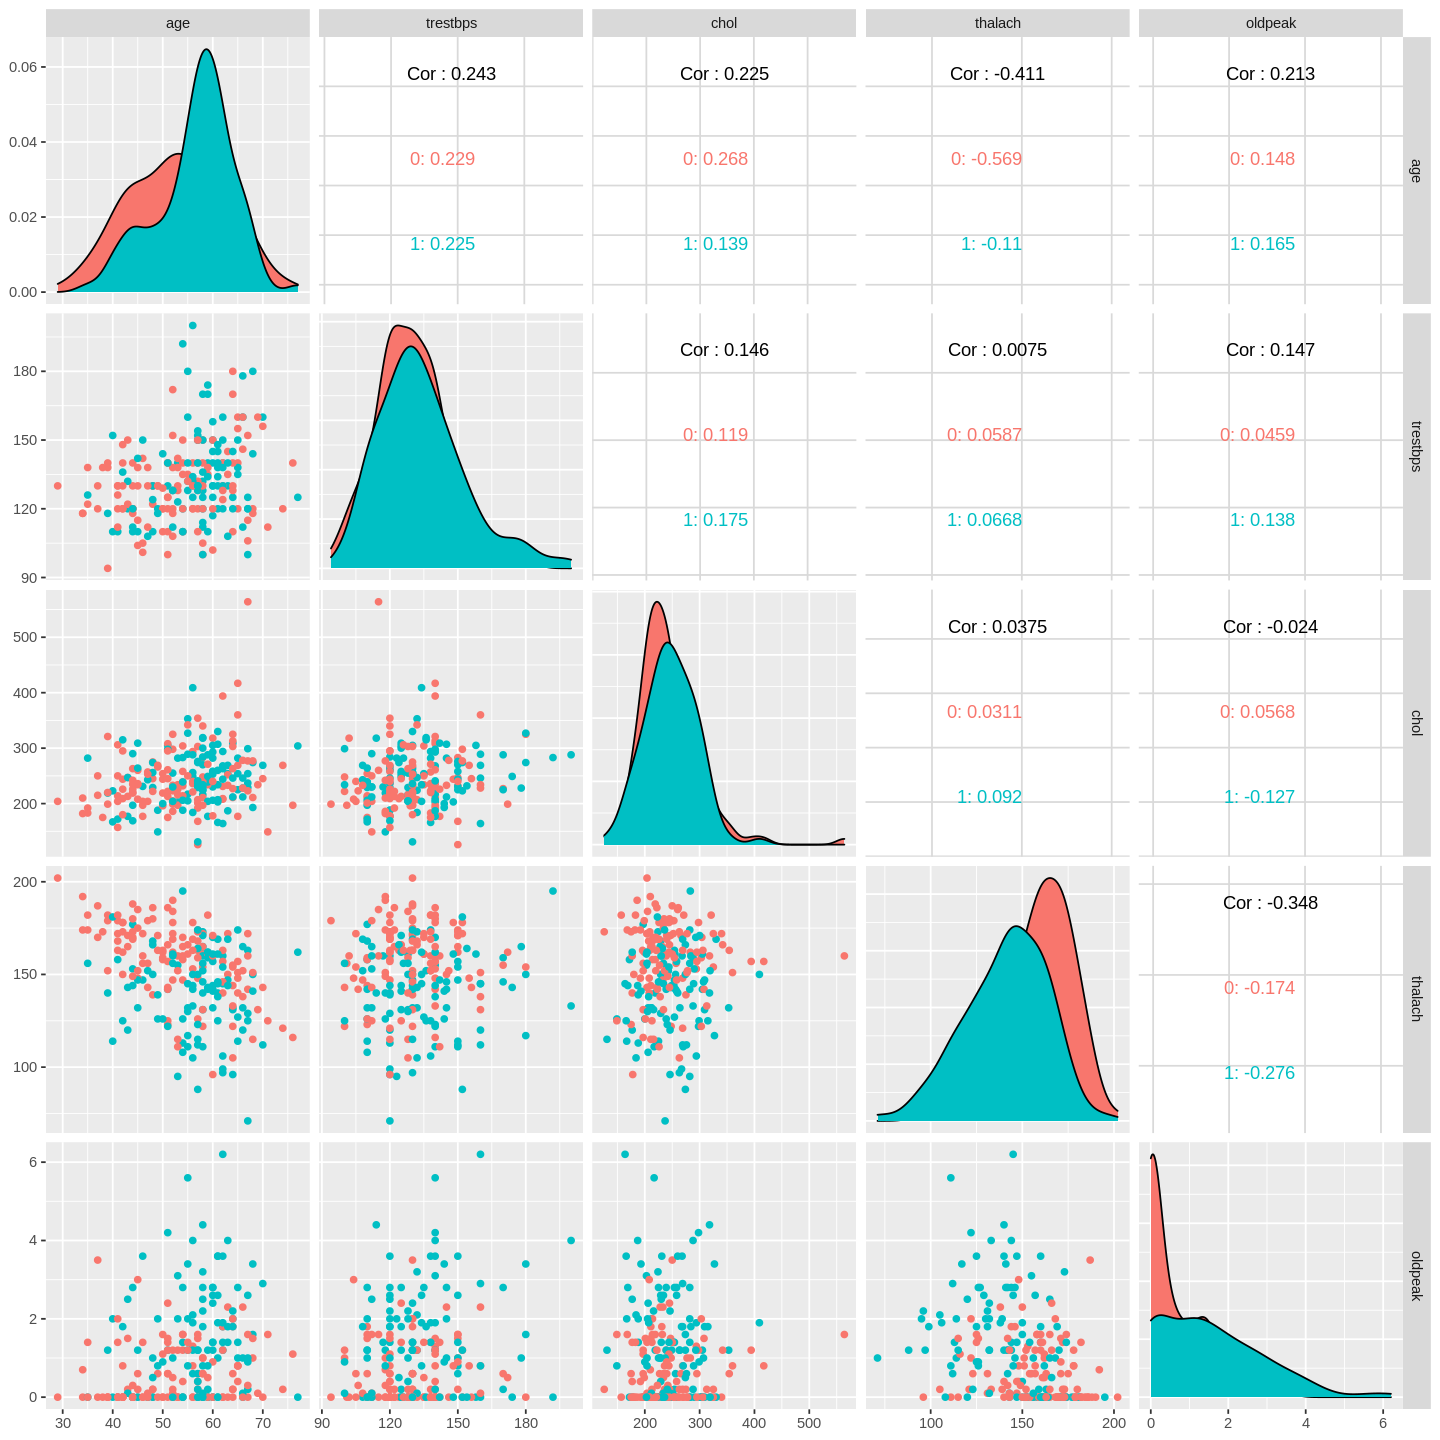

In [11]:
options(repr.plot.width=12,repr.plot.height = 12)

ggpairs(heart_train, columns = 1:5, ggplot2::aes(colour = diagnosis)) 

# Source: https://www.r-graph-gallery.com/199-correlation-matrix-with-ggally.html#:~:text=The%20ggpairs()%20function%20of,is%20available%20on%20the%20diagonal.

#### 5. Model Tuning and Cross-validation

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.60,5,0.035,Model01
3,accuracy,binary,0.62,5,0.032,Model02
5,accuracy,binary,0.68,5,0.032,Model03
7,accuracy,binary,0.70,5,0.025,Model04
9,accuracy,binary,0.70,5,0.011,Model05
11,accuracy,binary,0.67,5,0.025,Model06
13,accuracy,binary,0.67,5,0.014,Model07
15,accuracy,binary,0.68,5,0.023,Model08
17,accuracy,binary,0.68,5,0.023,Model09


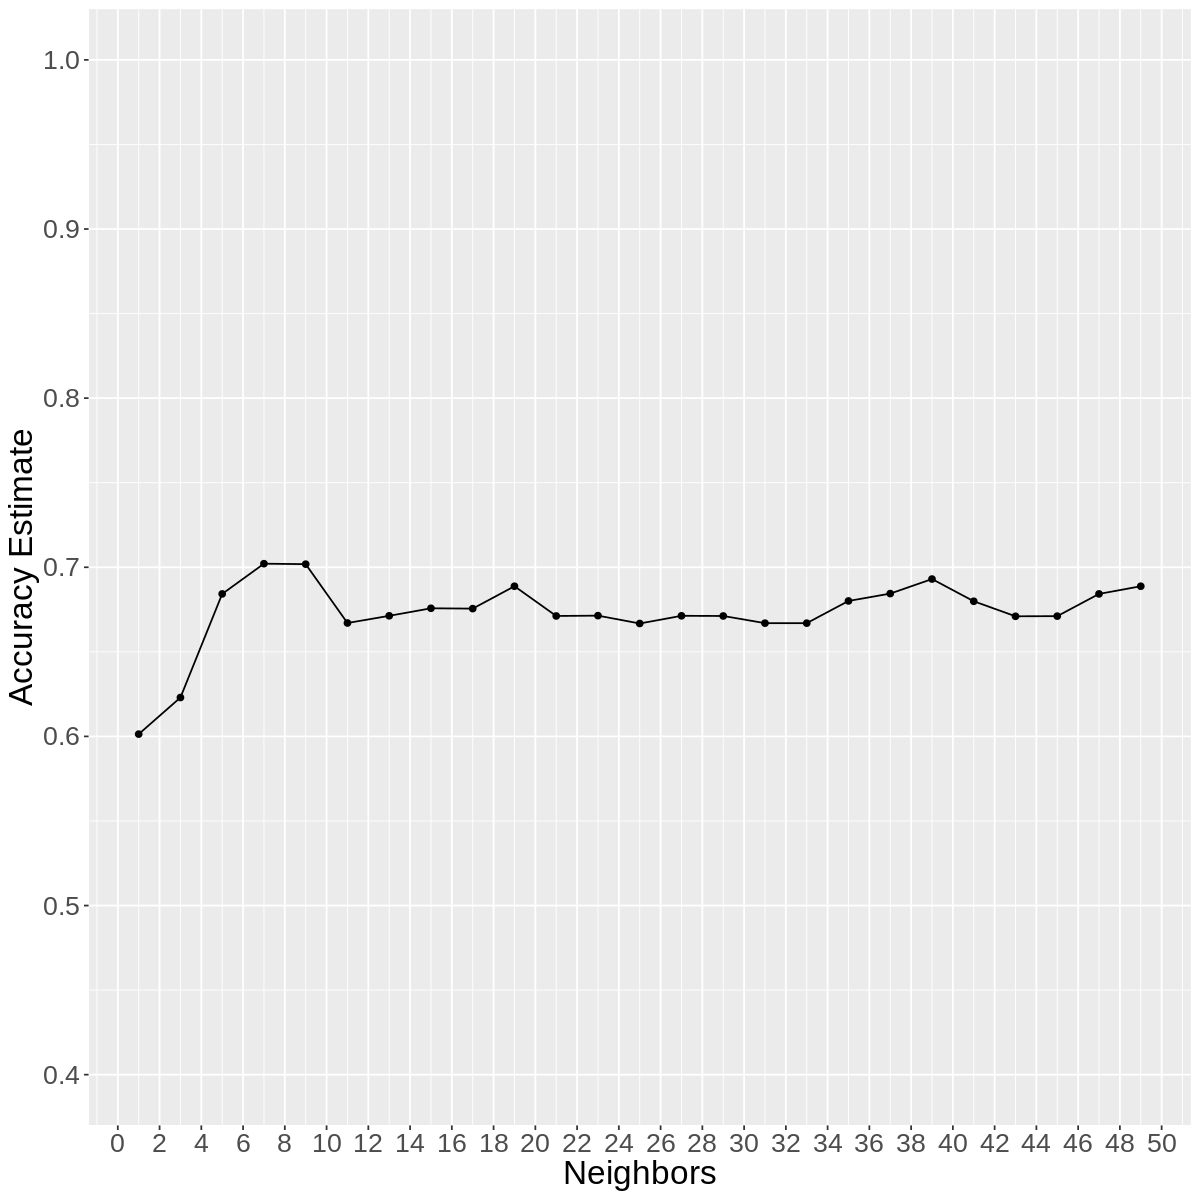

In [12]:
set.seed(200)
# Create the recipe that specifies class label and predictors, as well as preprocessing steps for all variables.
heart_recipe <- recipe(diagnosis ~ age + trestbps + chol + thalach + oldpeak, data = heart_train) %>%
                    step_scale(all_predictors()) %>%
                    step_center(all_predictors())
heart_recipe


# Create a KNN model specification
heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                    set_engine("kknn") %>%
                    set_mode("classification")
heart_tune


# Split the training data for cross-validation
heart_vfold <- vfold_cv(heart_train, v = 5, strata = diagnosis)


# Create a dataframe with a neighbors variable that contains the sequence of values of K to try
k_vals <- tibble(neighbors=seq(from = 1, to = 50, by = 2))


# Create a workflow to train KNN classifiers and estimate the classifier accuracy for a range of K values.
heart_results <- workflow() %>%
                    add_recipe(heart_recipe) %>%
                    add_model(heart_tune) %>%
                    tune_grid(resamples = heart_vfold, grid = k_vals) %>%
                    collect_metrics()
# heart_results


# Filter the accuracy metric of classifers trained with different value of K
accuracies <- heart_results %>%
                    filter(.metric == "accuracy")
accuracies


# Create a plot for accuracy vs. K
options (repr.plot.width = 10, repr.plot.height = 10)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 50, by = 2)) +  
      scale_y_continuous(limits = c(0.4, 1.0), breaks = seq (0.4, 1, by = 0.1)) +
      theme(text = element_text(size = 20))
accuracy_vs_k


# Pulling the optimal value of K
best_k <- accuracies %>%
            filter(mean==max(mean))%>%
            pull(neighbors)

#### 6. Build the KNN Classifier with the Optimal K value

In [13]:
# Create a new model specification for the optimal K value
heart_best <- nearest_neighbor (weight_func = 'rectangular', neighbors = best_k) %>%
                set_engine ('kknn') %>%
                set_mode ('classification')

# Retrain the classifier
heart_fit <- workflow () %>%
                add_recipe (heart_recipe) %>%
                add_model (heart_best) %>%
                fit (data = heart_train)

# Use the classifer to predict on the testing set 
heart_diagnosis_pred <- predict(heart_fit, heart_test) %>%
                            bind_cols(heart_test) 

# Collect evaluation metrics -- Accuracy
heart_accuracy <- heart_diagnosis_pred %>%
                        metrics(truth = diagnosis, estimate = .pred_class)%>%
                        filter(.metric == 'accuracy') %>%
                        select(.estimate) %>%
                        pull()

paste("The estimated Accuracy is:", as.character(heart_accuracy))


# Present the Confusion Matrix
confusion <- heart_diagnosis_pred %>%
                conf_mat(truth = diagnosis, estimate = .pred_class)
paste("Confusion Matrix:")
confusion

[1] "The estimated Accuracy is: 0.786666666666667"

[1] "Confusion Matrix:"

          Truth
Prediction  0  1
         0 33  8
         1  8 26

#### 7. Visualizing the Predition results.

In [90]:
# To add an index column to the data frame.
heart_diagnosis_pred$index <- 1:nrow(heart_diagnosis_pred)
head(heart_diagnosis_pred)

# Source: https://www.statology.org/add-index-column-to-data-frame-r/

.pred_class,age,trestbps,chol,thalach,oldpeak,diagnosis,index
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,67,160,286,108,1.5,1,1
1,66,150,226,114,2.6,0,2
1,69,140,239,151,1.8,0,3
1,64,140,335,158,0.0,1,4
0,44,130,233,179,0.4,0,5
1,61,150,243,137,1.0,0,6


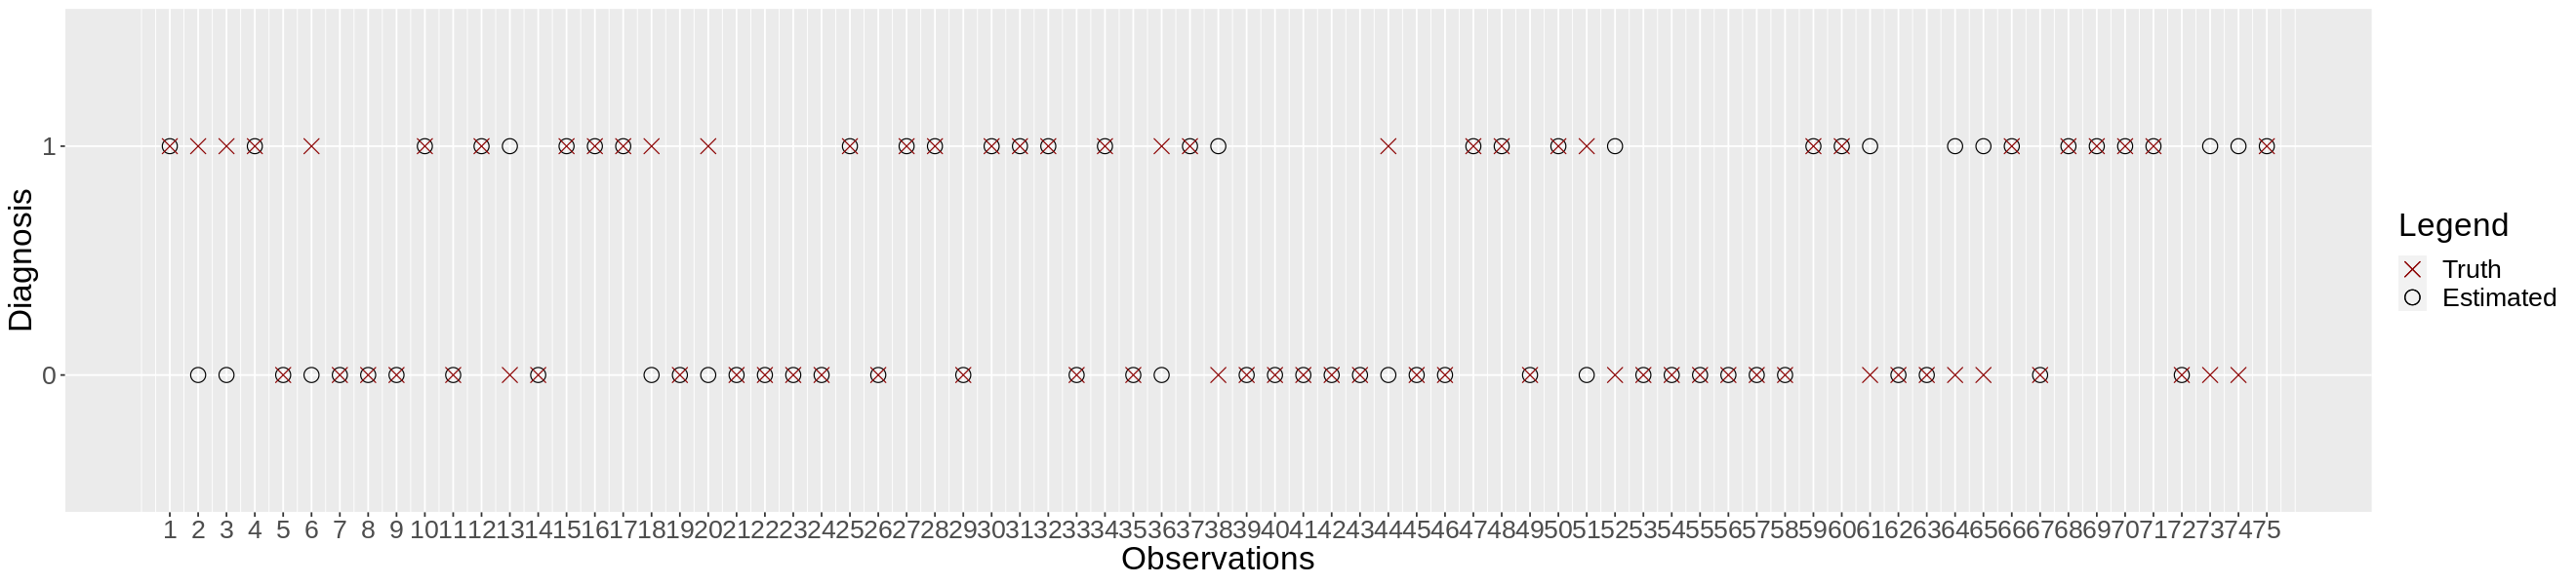

In [104]:
options(repr.plot.width=22,repr.plot.height=5)

colors <- c("Truth" = "black", "Estimated" = "#8B0000")
shapes <- c("truth" = 1, "estimated" = 4)
mapping <- ggplot(heart_diagnosis_pred,aes(x=index)) +
            geom_point(aes(y=diagnosis, color= 'Truth',shape='truth'),size=4)+
            geom_point(aes(y=.pred_class, color='Estimated',shape='estimated'),size=4)+
            scale_x_continuous(breaks=1:nrow(heart_diagnosis_pred)) +
            labs(x='Observations',y='Diagnosis',shape="",color="")+
            scale_color_manual(name="Legend", labels=c("Truth","Estimated"),values=colors)+
            scale_shape_manual(name="Legend", labels=c("Truth","Estimated"),values=shapes)+
            theme(text=element_text(size=20))
mapping

# Source: 
# http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r
# https://stackoverflow.com/questions/12410908/combine-legends-for-color-and-shape-into-a-single-legend
# https://community.rstudio.com/t/adding-manual-legend-to-ggplot2/41651/4

## Discussion
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?


## References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
Make sure to cite the source of your data as well.

## Expected Outcomes and Significance   
We are expecting that the medical information that can be readily collected from the patients together with the classifier built under the KNN algorithm can facilitate the diagnosis and prediction of heart diseases. If our project can support the above finding, we will be able to draw insights into building decision support systems to help clinicians to make better decisions on the necessity to take precautionary steps. Future questions would be what other relevant variables can be included in the model and how we could further improve the prediction accuracy of the classifier.